In [1]:
import os
import os.path as osp
import json
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble'] = '\\usepackage{amsmath,amssymb}'

In [3]:
drl_df = pd.read_csv('results/drl_policy.csv')
delay_drl_df = pd.read_csv('results/delay_drl_policy.csv')
delay_rnn_df = pd.read_csv('results/delay_rnn_policy.csv')
delay_greedy_df = pd.read_csv('results/delay_greedy_policy.csv')
delay_mnd_df = pd.read_csv('results/delay_mnd_policy.csv')

In [4]:
def plot_delay(N, labels=['ds', 'rnn']):
    periodic = 0.8623850363281251

    markers = ['o', '^', 'v', '*', 's']
    keys = ['AvgRet', 'StdRet', 'N', 'arch', 'seed']
    keys2 = ['AvgRet', 'StdRet', 'N', 'arch', 'seed', 'delay']

    kwargs = {'capsize': 2.5, 'lw':0.8, 'mfc': 'white', 'fmt': 'o', 'mew':0.8, 'ms': 5}
    arch_names = {'mlp': 'MLP', 'rnn': 'RNN', 'ds': 'DeepSets'}
    
    if N==1:
        a = 'mlp'
    else:
        a = 'ds'
    f = (delay_drl_df['N']==N) & (delay_drl_df['arch']==a)
    g = (drl_df['N']==N) & (drl_df['arch']==a)
    _drl_df = drl_df[g][keys]
    _drl_df['delay'] = 0.0
    _df = delay_drl_df[f][keys2].sort_values(by='delay')
    _df = _df.append(_drl_df)

    xs = []
    ys = []
    yerrs = []
    for row, data in _df.groupby(by='delay'):
        i = data['AvgRet'].idxmax()
        xs.append(row)
        ys.append(data.loc[i]['AvgRet'])
        yerrs.append(data.loc[i]['StdRet'])

    xs = 0.001 * np.array(xs)
    _greedy = delay_greedy_df[delay_greedy_df.N==N]
    _mnd = delay_mnd_df[delay_mnd_df.N==N]
    plt.errorbar(xs, _greedy['AvgRet'], _greedy['StdRet'], ls='-', marker='o', mec='C0', label='Greedy', **kwargs)
    plt.errorbar(xs, _mnd['AvgRet'], _mnd['StdRet'], ls='-', marker='^', mec='C1', label='MND', **kwargs)
    plt.errorbar(xs, ys, yerrs,
                 ls='--', marker='v', mec='C2', label=arch_names[a], **kwargs)
    
    a = labels[1]
    _df = delay_rnn_df[delay_rnn_df['N']==N].sort_values(by='delay')

    xs = []
    ys = []
    yerrs = []
    for row, data in _df.groupby(by='delay'):
        i = data['AvgRet'].idxmax()
        xs.append(row)
        ys.append(data.loc[i]['AvgRet'])
        yerrs.append(data.loc[i]['StdRet'])

    xs = 0.001 * np.array(xs)
    plt.errorbar(xs, ys, yerrs,
                 ls='--', marker='*', c='C3',  mec='C3', label='%s' %(arch_names[a]), **kwargs)        
    plt.axhline(periodic, ls=':', color='black')

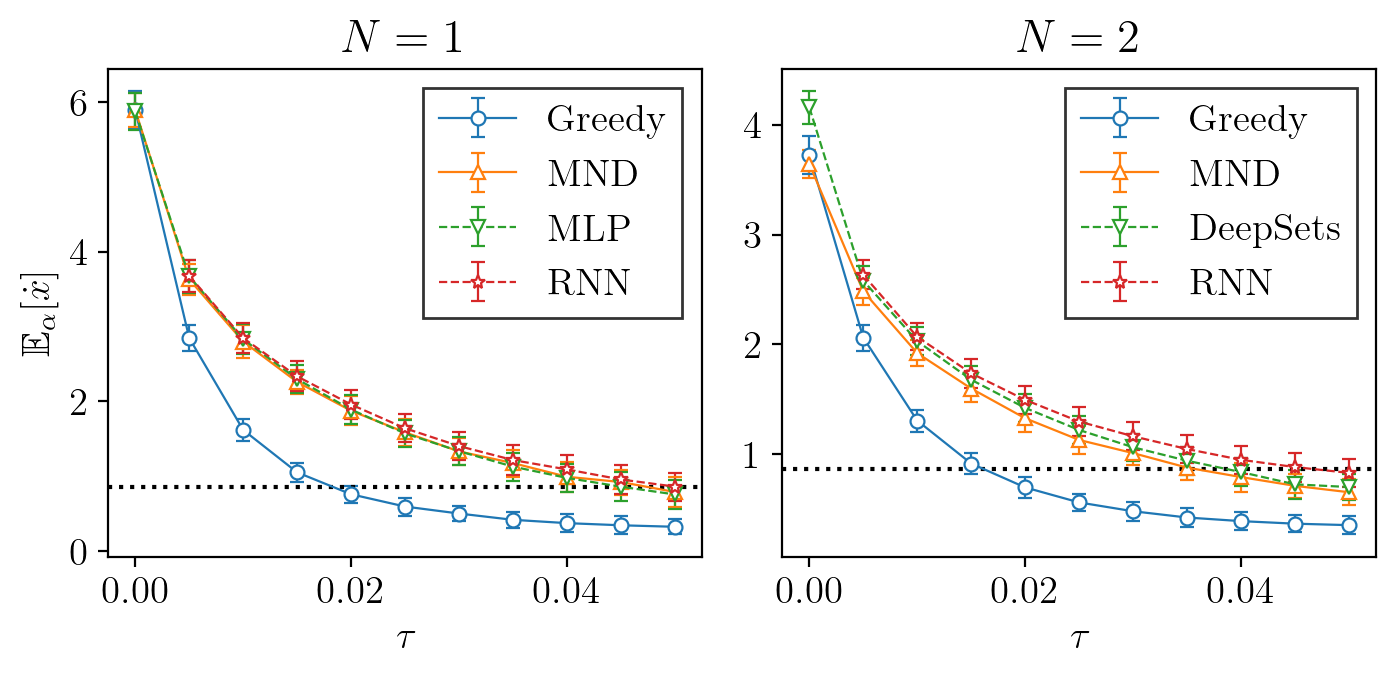

In [5]:
scale = 0.6
plt.figure(figsize=(12*scale,6*scale))
plt.subplot(1, 2, 1)

plot_delay(1)
plt.title(r'$N=1$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\mathbb{E}_\alpha[\dot{x}]$')
plt.legend()

plt.subplot(1, 2, 2)

plot_delay(2)
plt.title(r'$N=2$')
plt.xlabel(r'$\tau$')
plt.legend()
plt.tight_layout()
plt.show()

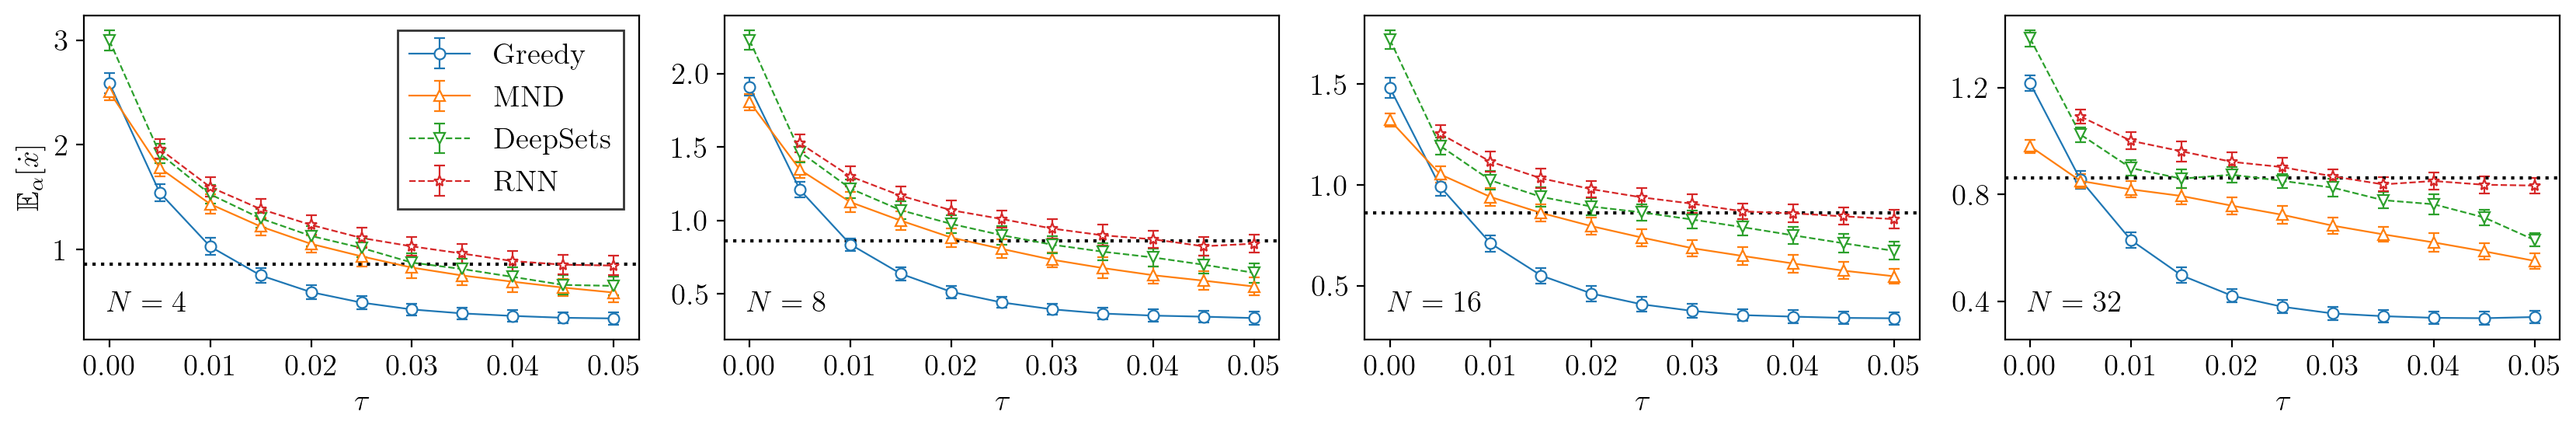

In [6]:
a=1.0
plt.figure(figsize=(16.8*a, 3*a))
for i, N in enumerate([4, 8, 16, 32]):
    plt.subplot(1, 4, i+1)
    plot_delay(N)
    ax=plt.gca()
    plt.text(0.04, 0.15, r'$N=%d$' %N, transform=ax.transAxes, verticalalignment='top')
    plt.xlabel(r'$\tau$')
    if i==0:
        plt.legend()
        plt.ylabel(r'$\mathbb{E}_\alpha[\dot{x}]$')
    if i==3:
        plt.yticks([0.4, 0.8, 1.2])
        
plt.tight_layout()
plt.show()